# Salary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

Wczytajmy dane znajdujące się w folderze ./data , plik salary.csv i spojrzmy na ich strukturę

In [2]:
import os

def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path)

In [3]:
data = load_data("salary.csv")
display(data.head())

data = data[:5000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Columns are:
 - age: continuous.
 - workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 - fnlwgt: continuous.
 - education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool.
 - education-num: continuous.
 - marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 - occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 - relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 - race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 - sex: Female, Male.
 - capital-gain: continuous.
 - capital-loss: continuous.
 - hours-per-week: continuous.
 - native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 - salary: <=50K or >50K

Just to make some not obvious things clear:

- The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.
- education-num - number of years of education

In [4]:
data[data.columns] = data[data.columns].replace(" ?", np.nan)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       4669 non-null   object
 2   fnlwgt          5000 non-null   int64 
 3   education       5000 non-null   object
 4   education-num   5000 non-null   int64 
 5   marital-status  5000 non-null   object
 6   occupation      4669 non-null   object
 7   relationship    5000 non-null   object
 8   race            5000 non-null   object
 9   sex             5000 non-null   object
 10  capital-gain    5000 non-null   int64 
 11  capital-loss    5000 non-null   int64 
 12  hours-per-week  5000 non-null   int64 
 13  native-country  4903 non-null   object
 14  salary          5000 non-null   object
dtypes: int64(6), object(9)
memory usage: 586.1+ KB


Widzimy, że w ałym datasecie mamy 32561 wiersze.

W kolumnie workclass mamy 1836 wartości null (5.6%) 

W kolumnie occupation mamy 1843 wartości null (5.7%)

W kolumnie native-country mamy 583 wartości null (1.8%)

In [6]:
data.isna().sum()

age                 0
workclass         331
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        331
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     97
salary              0
dtype: int64

Widzimy, że mamy stosunkowo mało wierszy z nullową kollumną native-country. \
Najlepszym i najprostszym podejściem w takiej sytuacji wydaje się być po prostu usunięcie tych rekordów.

In [7]:
data=data[data['native-country'].notna()]

In [8]:
print(data.isna().sum())
print(data.info())

age                 0
workclass         323
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        323
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
salary              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4903 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4903 non-null   int64 
 1   workclass       4580 non-null   object
 2   fnlwgt          4903 non-null   int64 
 3   education       4903 non-null   object
 4   education-num   4903 non-null   int64 
 5   marital-status  4903 non-null   object
 6   occupation      4580 non-null   object
 7   relationship    4903 non-null   object
 8   race            4903 non-null   object
 9   sex             4903 non-null   object
 10  capital-gain    4

In [9]:
data["occupation"].value_counts()

 Exec-managerial      609
 Prof-specialty       606
 Craft-repair         603
 Sales                578
 Adm-clerical         567
 Other-service        484
 Machine-op-inspct    308
 Transport-moving     242
 Handlers-cleaners    195
 Farming-fishing      141
 Tech-support         139
 Protective-serv       89
 Priv-house-serv       17
 Armed-Forces           2
Name: occupation, dtype: int64

Wartości nullowe w kolumnie occupation wypełnimy wartością domyślną Other-service, a dla wartości nullowych kolumny workclass wprowadzimy nową wartość Other. 

In [10]:
data["occupation"].fillna(value=" Other-service", inplace=True)
data["workclass"].fillna(value=" Other", inplace=True)

print(data["occupation"].value_counts())
print(data["workclass"].value_counts())


 Other-service        807
 Exec-managerial      609
 Prof-specialty       606
 Craft-repair         603
 Sales                578
 Adm-clerical         567
 Machine-op-inspct    308
 Transport-moving     242
 Handlers-cleaners    195
 Farming-fishing      141
 Tech-support         139
 Protective-serv       89
 Priv-house-serv       17
 Armed-Forces           2
Name: occupation, dtype: int64
 Private             3369
 Self-emp-not-inc     378
 Local-gov            324
 Other                323
 State-gov            189
 Self-emp-inc         175
 Federal-gov          144
 Without-pay            1
Name: workclass, dtype: int64


### Zamienimy kluczy na binarne wartości

In [11]:
data = data.replace([">50K", "<=50K"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


### Zrobimy to samo dla innej binarnej kolumny ''sex" 

In [12]:
data = data.replace(["Female", "Male"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1


Podzielimy dane na kolumny kategoryczne, numeryczne i binarne

Kolumny numeryczne : age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week \
Kolumny kategoryczne : workclass, education, marital-status, occupation, relationship, race, native-country \
Kolumny binarne : sex, salary

In [13]:
numerical_fields = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_fields = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country"]
binary_fields = ["sex", "salary"]

## Przyjżyjmy się dokładniej danym numerycznym

In [14]:
data.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
count,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,38.574954,1.909784e+05,10.071181,0.672038,1012.826025,92.925352,40.511931,0.757291
std,13.614604,1.069148e+05,2.521639,0.469519,6963.589486,409.241640,12.103281,0.428764
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174990e+05,9.000000,0.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.795570e+05,10.000000,1.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,2.419565e+05,12.000000,1.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.033222e+06,16.000000,1.000000,99999.000000,2547.000000,99.000000,1.000000


Najprawdopodobniej będziemy ignorować kolumny capital-gain i kapital-loss z powodu tego, że prawie zawsze mają wartośc 0

In [15]:
print(data["capital-loss"].value_counts())

0       4655
1902      38
1977      30
1887      23
1485       9
1848       9
2415       9
1741       7
1762       6
1564       6
1719       6
1876       6
1590       6
1672       6
1740       5
1669       5
1980       5
1628       5
2002       4
2392       4
2339       4
1408       4
2258       3
1340       3
1579       3
2179       3
2001       3
625        2
2051       2
1816       2
1721       2
1504       2
2352       2
1380       2
2377       2
2206       2
1651       1
1138       1
1092       1
1668       1
880        1
1539       1
213        1
2238       1
2205       1
2444       1
1726       1
2174       1
2547       1
419        1
1602       1
653        1
2042       1
1594       1
Name: capital-loss, dtype: int64


In [16]:
print(data["capital-gain"].value_counts())

0        4495
15024      64
7688       46
7298       35
99999      21
         ... 
3818        1
401         1
1111        1
1471        1
2346        1
Name: capital-gain, Length: 81, dtype: int64


### Przyjrzyjmy się pozostałym kolumnam numerycznym

In [17]:
print(data["fnlwgt"].value_counts())

123983    5
94235     4
155343    4
163003    4
111567    4
         ..
166744    1
238768    1
176270    1
140592    1
54947     1
Name: fnlwgt, Length: 4523, dtype: int64


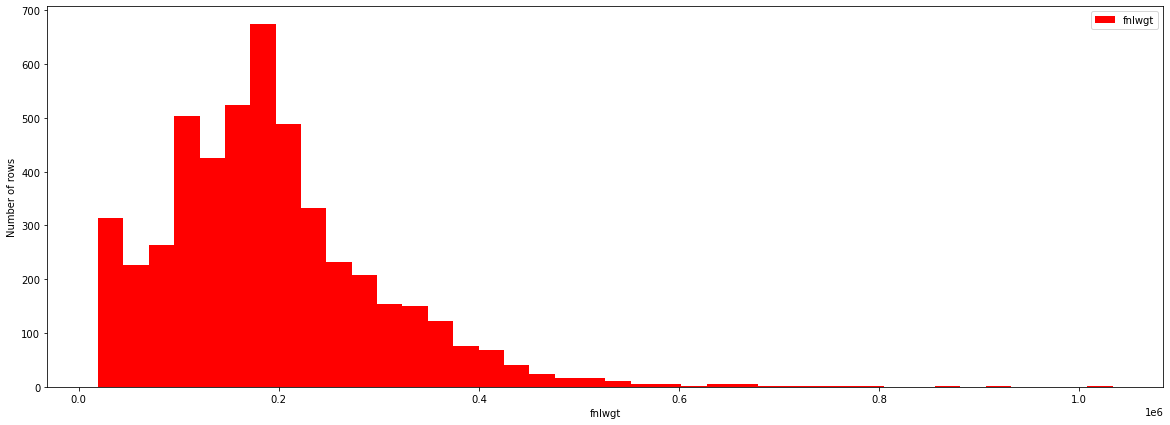

In [18]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['fnlwgt'], bins=40, color="red", label='fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

#### popatrzmy jak jest rozpodzielony wiek w naszy datasecie

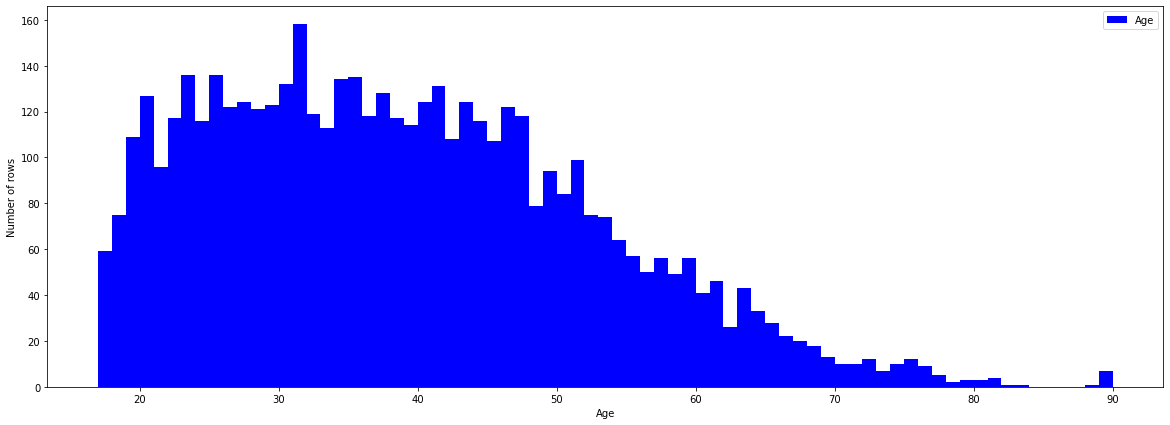

In [19]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['age'], bins=73, color="blue", label='Age')
plt.xlabel('Age')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

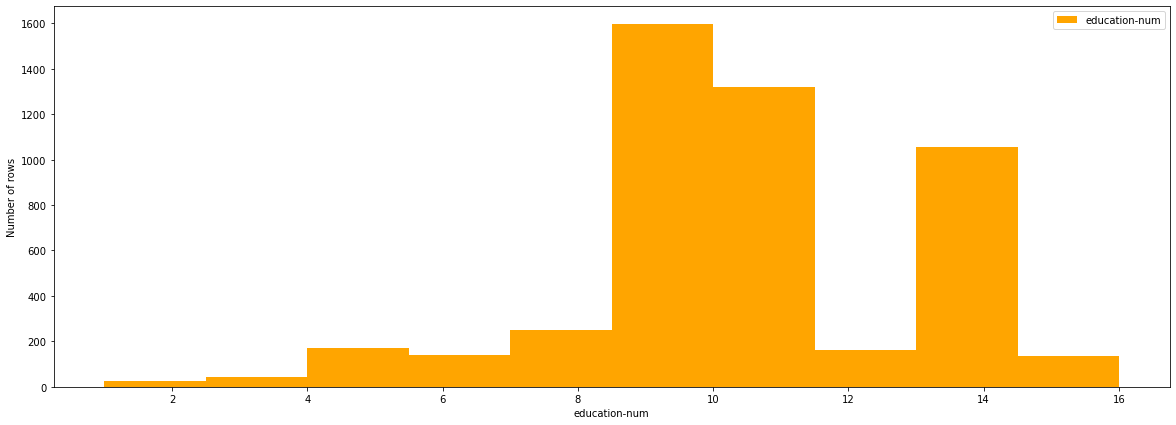

In [20]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['education-num'], bins=10, color="orange", label='education-num')
plt.xlabel('education-num')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

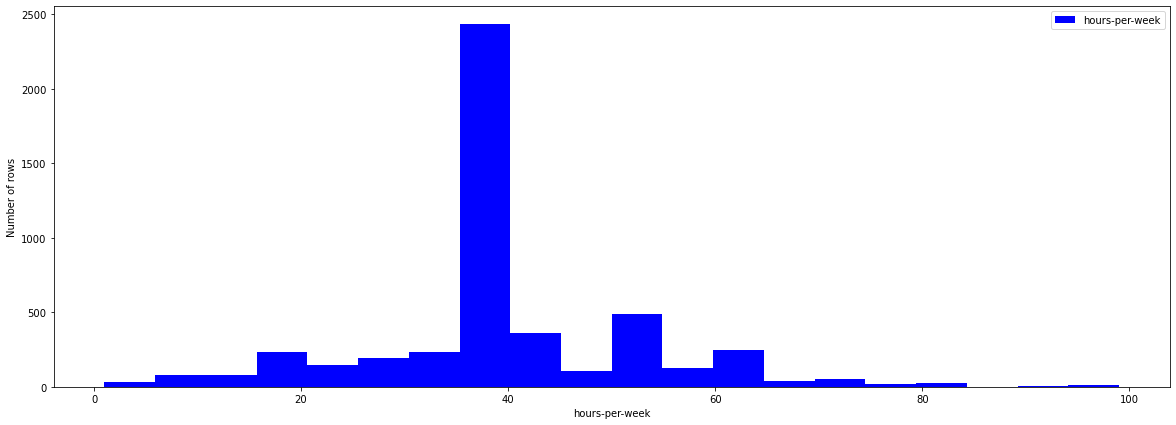

In [21]:
fig = plt.figure(figsize=(20,7))
plt.hist(data['hours-per-week'], bins=20, color="blue", label='hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Number of rows')
plt.legend()
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

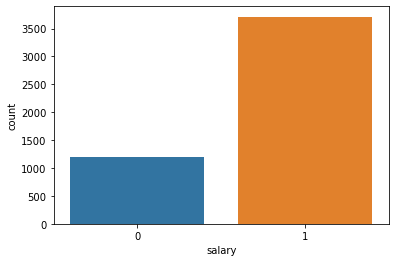

In [22]:
import seaborn as sns 
sns.countplot(data["salary"])

Widzimy, że klasa negatywna i pozytywna są przedstawione w datasecie w różnych proporscjach, więc musimy pamiętać, aby koniecznie używać StratifiedKFold().

Resztę pozostawiamy bez zmian 

## Przyjrzyjmy się kolumnam kategorycznym

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [24]:
print(data["workclass"].value_counts())
# le.fit(data["workclass"])
# data["workclass"] = le.transform(data["workclass"])

 Private             3369
 Self-emp-not-inc     378
 Local-gov            324
 Other                323
 State-gov            189
 Self-emp-inc         175
 Federal-gov          144
 Without-pay            1
Name: workclass, dtype: int64


In [25]:
print(data["education"].value_counts())
# le.fit(data["education"])
# data["education"] = le.transform(data["education"])

 HS-grad         1595
 Some-college    1106
 Bachelors        809
 Masters          246
 Assoc-voc        215
 11th             198
 Assoc-acdm       161
 10th             142
 7th-8th           96
 Prof-school       85
 9th               76
 12th              53
 Doctorate         52
 5th-6th           42
 1st-4th           20
 Preschool          7
Name: education, dtype: int64


In [26]:
print(data["marital-status"].value_counts())
# le.fit(data["marital-status"])
# data["marital-status"] = le.transform(data["marital-status"])

 Married-civ-spouse       2219
 Never-married            1629
 Divorced                  677
 Widowed                   159
 Separated                 153
 Married-spouse-absent      61
 Married-AF-spouse           5
Name: marital-status, dtype: int64


In [27]:
print(data["occupation"].value_counts())
# le.fit(data["occupation"])
# data["occupation"] = le.transform(data["occupation"])

 Other-service        807
 Exec-managerial      609
 Prof-specialty       606
 Craft-repair         603
 Sales                578
 Adm-clerical         567
 Machine-op-inspct    308
 Transport-moving     242
 Handlers-cleaners    195
 Farming-fishing      141
 Tech-support         139
 Protective-serv       89
 Priv-house-serv       17
 Armed-Forces           2
Name: occupation, dtype: int64


In [28]:
print(data["relationship"].value_counts())
# le.fit(data["relationship"])
# data["relationship"] = le.transform(data["relationship"])

 Husband           1954
 Not-in-family     1264
 Own-child          760
 Unmarried          537
 Wife               241
 Other-relative     147
Name: relationship, dtype: int64


In [29]:
print(data["race"].value_counts())
# le.fit(data["race"])
# data["race"] = le.transform(data["race"])

 White                 4185
 Black                  502
 Asian-Pac-Islander     139
 Amer-Indian-Eskimo      49
 Other                   28
Name: race, dtype: int64


In [30]:
print(data["native-country"].value_counts())
# le.fit(data["native-country"])
# data["native-country"] = le.transform(data["native-country"])

 United-States                 4465
 Mexico                         104
 Canada                          28
 Philippines                     22
 Germany                         22
 El-Salvador                     16
 Puerto-Rico                     16
 England                         16
 Jamaica                         15
 China                           15
 Cuba                            14
 Dominican-Republic              13
 Italy                           12
 India                           12
 Iran                            11
 Vietnam                         10
 Taiwan                          10
 Guatemala                       10
 Poland                           9
 South                            9
 Japan                            9
 Portugal                         7
 Greece                           6
 Haiti                            6
 Columbia                         5
 Nicaragua                        5
 Trinadad&Tobago                  4
 Ireland                    

Będziemy brać pod uwagę wszystkie kolumny kategoryczne. 

In [31]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,0,0,0,40,Mexico,1
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40,United-States,0
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40,United-States,0
4998,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,1,0,0,60,United-States,1


### Stworzymy DataFrame Selector

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Zbudujmy pipeline dla atrybutów numerycznych

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_fields = ["age", "fnlwgt", "education-num", "hours-per-week"]

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(numerical_fields)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

Imputer dla kategorycznych kolumn

In [34]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Zbudujmy pipeline dla atrybutów kategorycznych

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

catbin = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country", "sex"]

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(catbin)),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

In [36]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

## Podzielimy zbiór danych na X i y

In [37]:
X = data.drop(['salary'], axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,0,0,0,40,Mexico
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40,United-States
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40,United-States
4998,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,1,0,0,60,United-States


In [38]:
y = data['salary'].values
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Podzielimy zbiór danych na train i test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [40]:
num_pipeline.fit_transform(X_train)

array([[2.80000e+01, 3.55259e+05, 1.40000e+01, 4.00000e+01],
       [4.20000e+01, 3.44920e+05, 1.00000e+01, 5.00000e+01],
       [6.20000e+01, 1.59841e+05, 9.00000e+00, 2.40000e+01],
       ...,
       [2.70000e+01, 1.63127e+05, 1.10000e+01, 3.50000e+01],
       [2.00000e+01, 1.70038e+05, 9.00000e+00, 4.00000e+01],
       [4.50000e+01, 1.33969e+05, 9.00000e+00, 5.00000e+01]])

In [41]:
cat_pipeline.fit_transform(X_train)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Płytkie uczenie

In [42]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', RandomForestClassifier())])

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [4,5,6,7,8],
    'classifier__criterion': ['gini', 'entropy']
}

forest = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10)
forest.fit(X_train, y_train)

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifier', 'preprocessing__n_jobs', 'preprocessing__transformer_list', 'preprocessing__transformer_weights', 'preprocessing__verbose', 'preprocessing__num_pipeline', 'preprocessing__cat_pipeline', 'preprocessing__num_pipeline__memory', 'preprocessing__num_pipeline__steps', 'preprocessing__num_pipeline__verbose', 'preprocessing__num_pipeline__select_numeric', 'preprocessing__num_pipeline__imputer', 'preprocessing__num_pipeline__select_numeric__attribute_names', 'preprocessing__num_pipeline__imputer__add_indicator', 'preprocessing__num_pipeline__imputer__copy', 'preprocessing__num_pipeline__imputer__fill_value', 'preprocessing__num_pipeline__imputer__missing_values', 'preprocessing__num_pipeline__imputer__strategy', 'preprocessing__num_pipeline__imputer__verbose', 'preprocessing__cat_pipeline__memory', 'preprocessing__cat_pipeline__steps', 'preprocessing__cat_pipeline__verbose', 'preprocessing__cat_pipeline__select_cat', 'prepr

[CV 2/5; 5/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=200;, score=0.777 total time=   0.3s
[CV 3/5; 5/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=200
[CV 3/5; 5/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=200;, score=0.774 total time=   0.3s
[CV 4/5; 5/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=200
[CV 4/5; 5/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=200;, score=0.773 total time=   0.3s
[CV 5/5; 5/60] START classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=200
[CV 5/5; 5/60] END classifier__criterion=gini, classifier__max_depth=4, classifier__max_features=log2, 

[CV 5/5; 10/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.824 total time=   1.6s
[CV 1/5; 11/60] START classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=200
[CV 1/5; 11/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=200;, score=0.801 total time=   0.3s
[CV 2/5; 11/60] START classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=200
[CV 2/5; 11/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=200;, score=0.799 total time=   0.3s
[CV 3/5; 11/60] START classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=200
[CV 3/5; 11/60] END classifier__criterion=gini, classifier__max_depth=5, classifier__max_features

[CV 3/5; 16/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.815 total time=   1.1s
[CV 4/5; 16/60] START classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 4/5; 16/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.818 total time=   1.6s
[CV 5/5; 16/60] START classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 5/5; 16/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.825 total time=   2.4s
[CV 1/5; 17/60] START classifier__criterion=gini, classifier__max_depth=6, classifier__max_features=log2, classifier__n_estimators=200
[CV 1/5; 17/60] END classifier__criterion=gini, classifier__max_depth=6, classifier__max_features

[CV 1/5; 22/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.821 total time=   1.3s
[CV 2/5; 22/60] START classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 2/5; 22/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.836 total time=   2.5s
[CV 3/5; 22/60] START classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 3/5; 22/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.818 total time=   1.3s
[CV 4/5; 22/60] START classifier__criterion=gini, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 4/5; 22/60] END classifier__criterion=gini, classifier__max_depth=7, classifier__max_features

[CV 4/5; 27/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.825 total time=   1.0s
[CV 5/5; 27/60] START classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 5/5; 27/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.838 total time=   0.6s
[CV 1/5; 28/60] START classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 1/5; 28/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.827 total time=   1.1s
[CV 2/5; 28/60] START classifier__criterion=gini, classifier__max_depth=8, classifier__max_features=sqrt, classifier__n_estimators=500
[CV 2/5; 28/60] END classifier__criterion=gini, classifier__max_depth=8, classifier__max_features

[CV 2/5; 33/60] END classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.827 total time=   0.7s
[CV 3/5; 33/60] START classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 3/5; 33/60] END classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.789 total time=   0.3s
[CV 4/5; 33/60] START classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 4/5; 33/60] END classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.806 total time=   0.3s
[CV 5/5; 33/60] START classifier__criterion=entropy, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 5/5; 33/60] END classifier__criterion=entropy, classifier__max_depth=4, cla

[CV 4/5; 38/60] END classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=auto, classifier__n_estimators=500;, score=0.808 total time=   1.0s
[CV 5/5; 38/60] START classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=auto, classifier__n_estimators=500
[CV 5/5; 38/60] END classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=auto, classifier__n_estimators=500;, score=0.824 total time=   1.1s
[CV 1/5; 39/60] START classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 1/5; 39/60] END classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200;, score=0.799 total time=   0.9s
[CV 2/5; 39/60] START classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200
[CV 2/5; 39/60] END classifier__criterion=entropy, classifier__max_depth=5, cla

[CV 1/5; 44/60] END classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=auto, classifier__n_estimators=500;, score=0.811 total time=   1.1s
[CV 2/5; 44/60] START classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=auto, classifier__n_estimators=500
[CV 2/5; 44/60] END classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=auto, classifier__n_estimators=500;, score=0.828 total time=   2.2s
[CV 3/5; 44/60] START classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=auto, classifier__n_estimators=500
[CV 3/5; 44/60] END classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=auto, classifier__n_estimators=500;, score=0.810 total time=   1.8s
[CV 4/5; 44/60] START classifier__criterion=entropy, classifier__max_depth=6, classifier__max_features=auto, classifier__n_estimators=500
[CV 4/5; 44/60] END classifier__criterion=entropy, classifier__max_depth=6, cla

[CV 3/5; 49/60] END classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=200;, score=0.818 total time=   0.4s
[CV 4/5; 49/60] START classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=200
[CV 4/5; 49/60] END classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=200;, score=0.824 total time=   0.4s
[CV 5/5; 49/60] START classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=200
[CV 5/5; 49/60] END classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=200;, score=0.821 total time=   0.4s
[CV 1/5; 50/60] START classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=auto, classifier__n_estimators=500
[CV 1/5; 50/60] END classifier__criterion=entropy, classifier__max_depth=7, cla

[CV 5/5; 54/60] END classifier__criterion=entropy, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=500;, score=0.822 total time=   1.9s
[CV 1/5; 55/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=200
[CV 1/5; 55/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=200;, score=0.824 total time=   1.0s
[CV 2/5; 55/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=200
[CV 2/5; 55/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=200;, score=0.838 total time=   0.7s
[CV 3/5; 55/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=auto, classifier__n_estimators=200
[CV 3/5; 55/60] END classifier__criterion=entropy, classifier__max_depth=8, cla

[CV 2/5; 60/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=500;, score=0.831 total time=   2.4s
[CV 3/5; 60/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=500
[CV 3/5; 60/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=500;, score=0.808 total time=   1.5s
[CV 4/5; 60/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=500
[CV 4/5; 60/60] END classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=500;, score=0.816 total time=   1.0s
[CV 5/5; 60/60] START classifier__criterion=entropy, classifier__max_depth=8, classifier__max_features=log2, classifier__n_estimators=500
[CV 5/5; 60/60] END classifier__criterion=entropy, classifier__max_depth=8, cla

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        FeatureUnion(transformer_list=[('num_pipeline',
                                                                        Pipeline(steps=[('select_numeric',
                                                                                         DataFrameSelector(attribute_names=['age',
                                                                                                                            'fnlwgt',
                                                                                                                            'education-num',
                                                                                                                            'hours-per-week'])),
                                                                                        ('imputer',
                  

In [50]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
svc_rbf = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10)
svc_rbf.fit(X_train, y_train)
svc_rbf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 1/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.757 total time=   0.5s
[CV 2/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 2/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.757 total time=   0.5s
[CV 3/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 3/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.758 total time=   0.5s
[CV 4/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 4/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.758 total time=   0.5s
[CV 5/5; 1/36] START classifier__C=0.001, classifier__gamma=0.001...............
[CV 5/5; 1/36] END classifier__C=0.001, classifier__gamma=0.001;, score=0.758 total time=   0.7s
[CV 1/5; 2/36] START classifier__C=0.001, classi

[CV 2/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.757 total time=   2.6s
[CV 3/5; 10/36] START classifier__C=0.01, classifier__gamma=1...................
[CV 3/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.758 total time=   1.1s
[CV 4/5; 10/36] START classifier__C=0.01, classifier__gamma=1...................
[CV 4/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.758 total time=   1.1s
[CV 5/5; 10/36] START classifier__C=0.01, classifier__gamma=1...................
[CV 5/5; 10/36] END classifier__C=0.01, classifier__gamma=1;, score=0.758 total time=   2.4s
[CV 1/5; 11/36] START classifier__C=0.01, classifier__gamma=10..................
[CV 1/5; 11/36] END classifier__C=0.01, classifier__gamma=10;, score=0.757 total time=   1.6s
[CV 2/5; 11/36] START classifier__C=0.01, classifier__gamma=10..................
[CV 2/5; 11/36] END classifier__C=0.01, classifier__gamma=10;, score=0.757 total time=   1.1s
[CV 3/5; 11/36] START classifier__C

[CV 4/5; 19/36] END classifier__C=1, classifier__gamma=0.001;, score=0.758 total time=   1.3s
[CV 5/5; 19/36] START classifier__C=1, classifier__gamma=0.001..................
[CV 5/5; 19/36] END classifier__C=1, classifier__gamma=0.001;, score=0.761 total time=   2.5s
[CV 1/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 1/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.760 total time=   1.3s
[CV 2/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 2/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.761 total time=   1.1s
[CV 3/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 3/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.762 total time=   2.3s
[CV 4/5; 20/36] START classifier__C=1, classifier__gamma=0.01...................
[CV 4/5; 20/36] END classifier__C=1, classifier__gamma=0.01;, score=0.759 total time=   1.7s
[CV 5/5; 20/36] START classifier__C

[CV 2/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.757 total time=   1.1s
[CV 3/5; 29/36] START classifier__C=10, classifier__gamma=10....................
[CV 3/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.758 total time=   1.5s
[CV 4/5; 29/36] START classifier__C=10, classifier__gamma=10....................
[CV 4/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.758 total time=   2.7s
[CV 5/5; 29/36] START classifier__C=10, classifier__gamma=10....................
[CV 5/5; 29/36] END classifier__C=10, classifier__gamma=10;, score=0.758 total time=   1.2s
[CV 1/5; 30/36] START classifier__C=10, classifier__gamma=100...................
[CV 1/5; 30/36] END classifier__C=10, classifier__gamma=100;, score=0.757 total time=   1.4s
[CV 2/5; 30/36] START classifier__C=10, classifier__gamma=100...................
[CV 2/5; 30/36] END classifier__C=10, classifier__gamma=100;, score=0.757 total time=   2.6s
[CV 3/5; 30/36] START classifier__C=10, c

{'classifier__C': 10, 'classifier__gamma': 0.01}

In [ ]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='linear'))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
svc_linear = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10)
svc_linear.fit(X_train, y_train)
svc_linear.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START classifier__C=0.001.........................................
[CV 1/5; 1/6] END ..........classifier__C=0.001;, score=0.754 total time= 3.7min
[CV 2/5; 1/6] START classifier__C=0.001.........................................
[CV 2/5; 1/6] END ..........classifier__C=0.001;, score=0.738 total time= 4.7min
[CV 3/5; 1/6] START classifier__C=0.001.........................................
[CV 3/5; 1/6] END ..........classifier__C=0.001;, score=0.758 total time= 4.8min
[CV 4/5; 1/6] START classifier__C=0.001.........................................
[CV 4/5; 1/6] END ..........classifier__C=0.001;, score=0.761 total time= 5.0min
[CV 5/5; 1/6] START classifier__C=0.001.........................................
[CV 5/5; 1/6] END ..........classifier__C=0.001;, score=0.746 total time= 4.5min
[CV 1/5; 2/6] START classifier__C=0.01..........................................


In [53]:
from scipy.stats.distributions import uniform, randint

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', XGBClassifier())])

param_distribution = {
    'classifier__max_depth': randint(3, 11),
    'classifier__learning_rate': uniform(0.001, 0.1-0.001),
    'classifier__n_estimators': randint(50, 400),
    'classifier__gamma': uniform(0,2),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__min_child_weight': randint(1, 11)
}


xgb = RandomizedSearchCV(pipe, param_distributions = param_distribution, n_iter = 15, verbose=10)
xgb.fit(X_train, y_train)
print(xgb.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START classifier__colsample_bytree=0.6521556741098171, classifier__gamma=0.9094809443804246, classifier__learning_rate=0.0806269776788234, classifier__max_depth=9, classifier__min_child_weight=1, classifier__n_estimators=88, classifier__subsample=0.7855196625941905
[CV 1/5; 1/15] END classifier__colsample_bytree=0.6521556741098171, classifier__gamma=0.9094809443804246, classifier__learning_rate=0.0806269776788234, classifier__max_depth=9, classifier__min_child_weight=1, classifier__n_estimators=88, classifier__subsample=0.7855196625941905;, score=0.844 total time=   0.5s
[CV 2/5; 1/15] START classifier__colsample_bytree=0.6521556741098171, classifier__gamma=0.9094809443804246, classifier__learning_rate=0.0806269776788234, classifier__max_depth=9, classifier__min_child_weight=1, classifier__n_estimators=88, classifier__subsample=0.7855196625941905
[CV 2/5; 1/15] END classifier__colsample_bytree=0.652155674109817

[CV 5/5; 3/15] END classifier__colsample_bytree=0.9585725425280502, classifier__gamma=0.5163602166055337, classifier__learning_rate=0.011211106742502967, classifier__max_depth=7, classifier__min_child_weight=10, classifier__n_estimators=252, classifier__subsample=0.7503833794040407;, score=0.844 total time=   2.8s
[CV 1/5; 4/15] START classifier__colsample_bytree=0.9092570964848536, classifier__gamma=1.398698405590885, classifier__learning_rate=0.002588541237866123, classifier__max_depth=5, classifier__min_child_weight=2, classifier__n_estimators=222, classifier__subsample=0.9911307824654183
[CV 1/5; 4/15] END classifier__colsample_bytree=0.9092570964848536, classifier__gamma=1.398698405590885, classifier__learning_rate=0.002588541237866123, classifier__max_depth=5, classifier__min_child_weight=2, classifier__n_estimators=222, classifier__subsample=0.9911307824654183;, score=0.814 total time=   2.0s
[CV 2/5; 4/15] START classifier__colsample_bytree=0.9092570964848536, classifier__gamma

[CV 4/5; 6/15] END classifier__colsample_bytree=0.5155322255304156, classifier__gamma=0.9812011637139368, classifier__learning_rate=0.06332965777893791, classifier__max_depth=7, classifier__min_child_weight=8, classifier__n_estimators=124, classifier__subsample=0.9113824665682175;, score=0.828 total time=   1.2s
[CV 5/5; 6/15] START classifier__colsample_bytree=0.5155322255304156, classifier__gamma=0.9812011637139368, classifier__learning_rate=0.06332965777893791, classifier__max_depth=7, classifier__min_child_weight=8, classifier__n_estimators=124, classifier__subsample=0.9113824665682175
[CV 5/5; 6/15] END classifier__colsample_bytree=0.5155322255304156, classifier__gamma=0.9812011637139368, classifier__learning_rate=0.06332965777893791, classifier__max_depth=7, classifier__min_child_weight=8, classifier__n_estimators=124, classifier__subsample=0.9113824665682175;, score=0.841 total time=   1.2s
[CV 1/5; 7/15] START classifier__colsample_bytree=0.7142131387462136, classifier__gamma=1

[CV 3/5; 9/15] END classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644169608918786, classifier__learning_rate=0.03678580587145931, classifier__max_depth=3, classifier__min_child_weight=10, classifier__n_estimators=283, classifier__subsample=0.9489075776123534;, score=0.827 total time=   1.6s
[CV 4/5; 9/15] START classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644169608918786, classifier__learning_rate=0.03678580587145931, classifier__max_depth=3, classifier__min_child_weight=10, classifier__n_estimators=283, classifier__subsample=0.9489075776123534
[CV 4/5; 9/15] END classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644169608918786, classifier__learning_rate=0.03678580587145931, classifier__max_depth=3, classifier__min_child_weight=10, classifier__n_estimators=283, classifier__subsample=0.9489075776123534;, score=0.838 total time=   1.8s
[CV 5/5; 9/15] START classifier__colsample_bytree=0.61573383679854, classifier__gamma=0.3644

[CV 2/5; 12/15] END classifier__colsample_bytree=0.6260419770264161, classifier__gamma=1.8089541167154652, classifier__learning_rate=0.06708351507466265, classifier__max_depth=9, classifier__min_child_weight=5, classifier__n_estimators=180, classifier__subsample=0.9739112092796963;, score=0.847 total time=   2.1s
[CV 3/5; 12/15] START classifier__colsample_bytree=0.6260419770264161, classifier__gamma=1.8089541167154652, classifier__learning_rate=0.06708351507466265, classifier__max_depth=9, classifier__min_child_weight=5, classifier__n_estimators=180, classifier__subsample=0.9739112092796963
[CV 3/5; 12/15] END classifier__colsample_bytree=0.6260419770264161, classifier__gamma=1.8089541167154652, classifier__learning_rate=0.06708351507466265, classifier__max_depth=9, classifier__min_child_weight=5, classifier__n_estimators=180, classifier__subsample=0.9739112092796963;, score=0.810 total time=   1.9s
[CV 4/5; 12/15] START classifier__colsample_bytree=0.6260419770264161, classifier__gam

[CV 1/5; 15/15] END classifier__colsample_bytree=0.9249440361430432, classifier__gamma=0.2956981961281695, classifier__learning_rate=0.06934680283137075, classifier__max_depth=5, classifier__min_child_weight=7, classifier__n_estimators=54, classifier__subsample=0.9616907152961207;, score=0.833 total time=   0.5s
[CV 2/5; 15/15] START classifier__colsample_bytree=0.9249440361430432, classifier__gamma=0.2956981961281695, classifier__learning_rate=0.06934680283137075, classifier__max_depth=5, classifier__min_child_weight=7, classifier__n_estimators=54, classifier__subsample=0.9616907152961207
[CV 2/5; 15/15] END classifier__colsample_bytree=0.9249440361430432, classifier__gamma=0.2956981961281695, classifier__learning_rate=0.06934680283137075, classifier__max_depth=5, classifier__min_child_weight=7, classifier__n_estimators=54, classifier__subsample=0.9616907152961207;, score=0.847 total time=   0.6s
[CV 3/5; 15/15] START classifier__colsample_bytree=0.9249440361430432, classifier__gamma=

NameError: name 'randm_src' is not defined

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression())])

param_grid = {
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none']
}
grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_4.fit(X_train, y_train)
grid_4.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The s

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.75757614        nan 0.75582687        nan 0.75757614
        nan 0.75582687        nan 0.75845078        nan 0.75582687
        nan 0.75582687        nan 0.75582687        nan 0.75582687
        nan 0.75582687        nan 0.75582687        nan 0.75582687
        nan 0.75582687        nan 0.75582687        nan 0.75582687
        nan 0.75582687]
  warnings.warn(

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}

Add decision tree, ensenble i  AdaBoost

In [54]:
from sklearn import  metrics

models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('Random Forest', forest.best_estimator_))
models.append(('Logistic', grid_4.best_estimator_))
models.append(('XGB', xgb.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
precision_score: 0.7598889659958362
recall_score: 0.9838274932614556
f1_score: 0.8574784651527017
accuracy_score: 0.752549286199864
forest
precision_score: 0.8408910103420844
recall_score: 0.949685534591195
f1_score: 0.8919831223628693
accuracy_score: 0.8259687287559483
Logistic
precision_score: 0.7566281441196465
recall_score: 1.0
f1_score: 0.8614551083591332
accuracy_score: 0.7566281441196465
XGB
precision_score: 0.8738197424892704
recall_score: 0.9146451033243486
f1_score: 0.893766461808604
accuracy_score: 0.8354860639021074


# Głębokie uczenie 

In [60]:
preprocess_pipeline.fit(X)
X_train2 = preprocess_pipeline.transform(X_train)
X_test2 = preprocess_pipeline.transform(X_test)

In [89]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

model_1 = keras.Sequential([
              Dense(100, activation='relu', name="1st_layer", input_shape=(X_train2.shape[1], )),
              Dropout(0.2),
              Dense(50, activation='relu', name="2nd_layer"),
              Dropout(0.2),
              Dense(20, activation='relu', name="3nd_layer"),
              Dropout(0.2),
              Dense(10, activation='relu', name="4nd_layer"),
              Dense(2, activation='sigmoid', name="output_layer")
], name="model_1")

In [90]:
model_1.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [91]:
history_1 = model_1.fit(X_train2, y_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_test2, y_test),
                      verbose=1)

Epoch 1/100
108/108 [==============================] - 1s 3ms/step - loss: 404.3959 - accuracy: 0.5994 - val_loss: 2.1154 - val_accuracy: 0.7566
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 62.1587 - accuracy: 0.6935 - val_loss: 0.6635 - val_accuracy: 0.7566
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 26.6581 - accuracy: 0.7165 - val_loss: 0.6433 - val_accuracy: 0.7566
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 15.0847 - accuracy: 0.7287 - val_loss: 0.6266 - val_accuracy: 0.7566
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 14.1399 - accuracy: 0.7191 - val_loss: 0.6116 - val_accuracy: 0.7566
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 7.1456 - accuracy: 0.7398 - val_loss: 0.5991 - val_accuracy: 0.7566
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 4.8391 - accuracy: 0.7453 - val_loss: 0.5887 - val_accuracy: 

Epoch 58/100
108/108 [==============================] - 1s 5ms/step - loss: 0.7462 - accuracy: 0.7558 - val_loss: 0.5549 - val_accuracy: 0.7566
Epoch 59/100
108/108 [==============================] - 1s 5ms/step - loss: 0.5826 - accuracy: 0.7564 - val_loss: 0.5549 - val_accuracy: 0.7566
Epoch 60/100
108/108 [==============================] - 1s 5ms/step - loss: 0.5996 - accuracy: 0.7567 - val_loss: 0.5549 - val_accuracy: 0.7566
Epoch 61/100
108/108 [==============================] - 1s 5ms/step - loss: 0.6195 - accuracy: 0.7576 - val_loss: 0.5549 - val_accuracy: 0.7566
Epoch 62/100
108/108 [==============================] - 1s 5ms/step - loss: 0.6889 - accuracy: 0.7567 - val_loss: 0.5549 - val_accuracy: 0.7566
Epoch 63/100
108/108 [==============================] - 1s 5ms/step - loss: 0.5546 - accuracy: 0.7576 - val_loss: 0.5549 - val_accuracy: 0.7566
Epoch 64/100
108/108 [==============================] - 0s 5ms/step - loss: 0.5840 - accuracy: 0.7576 - val_loss: 0.5549 - val_accuracy:

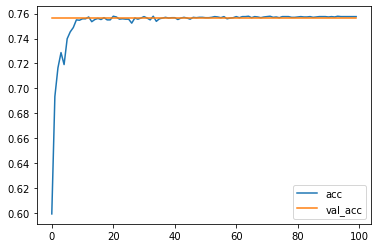

In [92]:
plt.plot(pd.DataFrame(history_1.history['accuracy']), label='acc')
plt.plot(pd.DataFrame(history_1.history['val_accuracy']), label='val_acc')

plt.legend()
plt.show()

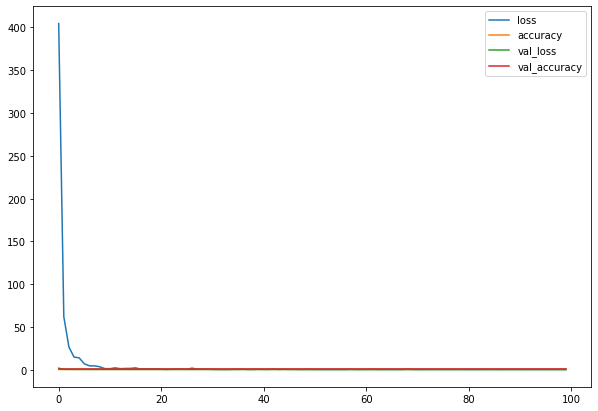

In [93]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));